Preparation of contact pattern matrix and $$\beta_{home}$$

# Transforming The Above Files:
### One should choose the division set for the model via the variable <b>'cell_name'</b> in the <i>indices.py</i> file in the model. The options are :
* 20
* 250
* 870

### In order to run this notebook One should make sure the above files exist:
* Data/division_choice
    * Data/division_choice/'cell_name'/cell2name.xlsx
    * Data/division_choice/'cell_name'/mat_macro_model_df.pickle
    * Data/division_choice/'cell_name'/taz2cell.xlsx
* Data/raw
    * Data/raw/pop2taz.xlsx
    * Data/raw/religion2taz.csv

    * Data/raw/leisure_mtx.csv
    * Data/raw/work_mtx.csv
    * Data/raw/school_mtx.csv

    * Data/raw/secularism_base_home.xlsx
    * Data/raw/haredi_base_home.xlsx
    * Data/raw/arabs_base_home.xlsx

    * Data/raw/taz_home_stay_by_periods.pickle
    
    * Data/raw/Summary_Home_0_TAZ.txt


### This Notebook generates the above files:
* Data/parameters
    - Data/parameters/beta_home.pickle
    - Data/parameters/stay_home_idx.pickle
    - Data/parameters/routine_t.pickle

* Data/demograph
    - Data/demograph/age_dist_area.csv
    - Data/demograph/religion_dis.csv
    - Data/demograph/sick_prop.csv

* Data/base_contact_mtx
    - Data/base_contact_mtx/full_home_mtx.csv
    - Data/base_contact_mtx/full_leisure_mtx_no_school.csv
    - Data/base_contact_mtx/full_leisure_mtx_no_work.csv
    - Data/base_contact_mtx/full_leisure_mtx_routine.csv
    - Data/base_contact_mtx/full_leisure_mtx_no_bb.csv
    - Data/base_contact_mtx/full_leisure_mtx_no_100_meters.csv
    - Data/base_contact_mtx/full_work_mtx_no_school.csv
    - Data/base_contact_mtx/full_work_mtx_no_work.csv
    - Data/base_contact_mtx/full_work_mtx_routine.csv
    - Data/base_contact_mtx/full_work_mtx_no_bb.csv
    - Data/base_contact_mtx/full_work_mtx_no_100_meters.csv
* Data/stay home
    - Data/stay_home/no_school.csv              
    - Data/stay_home/no_work.csv                
    - Data/stay_home/routine.csv                
    - Data/stay_home/no_bb.csv
    - Data/stay_home/no_100_meters.csv

# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import itertools
import pickle
from matplotlib import pyplot as plt
import datetime
import scipy
from scipy import optimize
from scipy.sparse import csr_matrix
import sys
import os
sys.path.append('../SEIR_full/')
sys.path.append('..')
from SEIR_full.indices import *
from SEIR_full.helper_func import *
%matplotlib inline

# Data Creation

## Consts

In [2]:
cell_name = '20'

## Creating demograph/age_dist_area.csv

In [3]:
pop_dist = pd.read_excel('../Data/raw/pop2taz.xlsx', header=2)

In [4]:
pop_dist.columns

Index(['אזור 2630', ' מודל מקור', 'תכולת אזורי תנועה במודל המקור',
       'כלול באזור תנועה (1250) ', 'סמל ישוב', 'שם היישוב/ ים',
       'אזור סטטיסטי ביישוב', 'פירוט האזור', 'שם ישוב, שכונה, מיתקן או רחובות',
       'שימוש קרקע עיקרי', 'ערכי שימושי קרקע', 'אוכלוסייה', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'גילאים', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'מקושר ל 1250', 'מקושר ל 250',
       'מקושר ל 33', 'נפה', 'מחוז', 'שטח (מ"ר)'],
      dtype='object')

In [5]:
ages_list = ['Unnamed: '+ str(i) for i in range(17,32)]

pop_dist = pop_dist[['אזור 2630', 'גילאים'] + ages_list]
pop_dist.columns = ['id'] + list(pop_dist.iloc[0,1:])

In [6]:
pop_dist = pop_dist.drop([0, 2631, 2632, 2633])

In [7]:
pop_dist['tot_pop'] = pop_dist.iloc[:, 1:].sum(axis=1)
pop_dist['tot_pop'][pop_dist['tot_pop'] == 0] = 1
pop_dist = pop_dist.iloc[:,1:-1].div(pop_dist['tot_pop'], axis=0).join(pop_dist['id']).join(pop_dist['tot_pop'])
pop_dist['tot_pop'][pop_dist['tot_pop'] == 1] = 0
pop_dist['tot_pop'] = pop_dist['tot_pop']/pop_dist['tot_pop'].sum()
pop_dist.iloc[:,:-2] = pop_dist.iloc[:,:-2].mul(pop_dist['tot_pop'], axis=0)
pop_dist

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+,id,tot_pop
1,4.46203e-05,4.73732e-05,5.3682e-05,8.167e-05,4.66849e-05,3.5788e-05,1.50264e-05,1.58293e-05,2.14498e-05,2.13351e-05,2.54645e-05,2.25969e-05,1.51411e-05,5.27643e-06,2.40881e-06,5.39114e-06,1,0.000460
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0.000000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0.000000
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0.000000
5,1.23881e-05,1.05529e-05,7.57053e-06,6.19407e-06,4.5882e-06,6.19407e-06,7.91465e-06,1.05529e-05,9.97934e-06,8.60288e-06,6.19407e-06,7.34112e-06,8.71758e-06,1.04382e-05,9.29111e-06,8.14406e-06,5,0.000135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626,0.000239275,0.000199472,0.00016724,0.000167699,0.000135008,0.000105185,7.30671e-05,5.9876e-05,5.59761e-05,4.59967e-05,3.06262e-05,1.92704e-05,1.60587e-05,1.06676e-05,8.25876e-06,8.14406e-06,2626,0.001342
2627,0.000137187,0.00012262,0.000113443,0.000110576,8.78641e-05,6.80201e-05,4.64555e-05,4.46203e-05,3.93438e-05,3.48703e-05,1.88116e-05,1.3994e-05,9.1764e-06,5.16173e-06,5.27643e-06,7.68524e-06,2627,0.000865
2628,0.000279536,0.000242945,0.000225625,0.000214154,0.000178252,0.000135925,9.81875e-05,8.06376e-05,7.67377e-05,6.21701e-05,4.06056e-05,2.62675e-05,1.97293e-05,1.23881e-05,1.07823e-05,1.04382e-05,2628,0.001714
2629,0.000222184,0.000217825,0.000191787,0.000182381,0.000193163,0.000192819,0.00019821,0.000188919,0.00019236,0.000187199,0.000162422,0.000129731,0.000114705,8.87817e-05,6.49231e-05,6.53819e-05,2629,0.002593


In [8]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')

In [9]:
taz2cell = taz2cell[['taz_id', 'cell_id']]
taz2cell.columns = ['id', 'new_id']

In [10]:
taz2cell

,id,new_id
0,1,43
1,2,51_tlv
2,3,51_tlv
3,4,51_tlv
4,5,51_tlv
...,...,...
2625,2626,62_arab
2626,2627,62_arab
2627,2628,62_arab
2628,2629,62


In [11]:
pop_cell = pop_dist.merge(taz2cell, left_on='id', right_on='id')
pop_cell['new_id'] = pop_cell['new_id'].astype(str)
pop_cell.sort_values(by='new_id')

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+,id,tot_pop,new_id
1314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1315,0.000000,11
1149,7.39847e-05,5.95319e-05,4.56526e-05,4.26703e-05,4.67997e-05,4.87496e-05,3.72791e-05,2.38586e-05,1.5944e-05,1.64028e-05,1.54852e-05,1.92704e-05,1.45675e-05,1.45675e-05,1.15852e-05,2.59233e-05,1150,0.000512,11
1150,3.22321e-05,1.99587e-05,1.50264e-05,1.04382e-05,2.14498e-05,5.3682e-05,4.26703e-05,2.81027e-05,2.23675e-05,1.51411e-05,1.51411e-05,1.80087e-05,1.52558e-05,2.47763e-05,2.67263e-05,6.64142e-05,1151,0.000427,11
1151,6.19407e-06,4.12938e-06,2.86763e-06,2.75292e-06,4.12938e-06,8.94699e-06,7.79994e-06,5.04702e-06,5.16173e-06,2.98233e-06,3.78527e-06,3.78527e-06,4.24409e-06,6.30878e-06,6.8823e-06,1.67469e-05,1152,0.000092,11
1152,4.9782e-05,3.80821e-05,2.81027e-05,1.49117e-05,3.26909e-05,4.64555e-05,4.14085e-05,2.42028e-05,1.42234e-05,1.06676e-05,1.41087e-05,1.55999e-05,1.51411e-05,2.38586e-05,2.04175e-05,7.26083e-05,1153,0.000462,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1572,0.000000,71
1572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1573,0.000000,71
1573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1574,0.000000,71
1557,4.03762e-05,4.31291e-05,2.9938e-05,1.82381e-05,1.94999e-05,1.33058e-05,2.33998e-05,2.20234e-05,1.9041e-05,1.70911e-05,1.0897e-05,1.14705e-05,9.40581e-06,4.24409e-06,2.2941e-06,1.72058e-06,1558,0.000286,71


In [12]:
def make_pop(df):
    df = df.iloc[:,0:-2]
    return df.sum(axis=0)

In [13]:
pop_cell = pop_cell.groupby(by='new_id').apply(lambda df: make_pop(df))

In [14]:
pop_cell

,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75+,id
new_id,,,,,,,,,,,,,,,,,
11,0.013979,0.012611,0.011329,0.010693,0.009852,0.008464,0.007345,0.006310,0.005635,0.004979,0.004416,0.004195,0.003745,0.003354,0.002551,0.004553,364303.0
11_betshemesh,0.002288,0.002029,0.001731,0.001184,0.000950,0.000916,0.000820,0.000697,0.000599,0.000479,0.000361,0.000306,0.000237,0.000179,0.000123,0.000199,68524.0
21,0.001418,0.001315,0.001202,0.001100,0.001050,0.001067,0.000855,0.000744,0.000769,0.000715,0.000668,0.000691,0.000631,0.000528,0.000371,0.000618,83641.0
22,0.001270,0.001194,0.001115,0.001144,0.001069,0.001038,0.000854,0.000809,0.000823,0.000736,0.000677,0.000676,0.000628,0.000524,0.000360,0.000572,72476.0
23,0.005327,0.005231,0.005097,0.005213,0.004589,0.004226,0.003492,0.003414,0.003626,0.003277,0.002937,0.002625,0.002311,0.001867,0.001348,0.002113,235975.0
24,0.006462,0.006577,0.006661,0.006841,0.005947,0.005540,0.004686,0.004583,0.004842,0.004356,0.003897,0.003416,0.002833,0.002259,0.001573,0.002483,354520.0
29,0.000527,0.000564,0.000541,0.000563,0.000447,0.000378,0.000363,0.000403,0.000406,0.000346,0.000270,0.000246,0.000217,0.000188,0.000106,0.000124,24039.0
31,0.005195,0.004713,0.004210,0.004030,0.004332,0.004617,0.004596,0.004339,0.004122,0.003784,0.003437,0.003609,0.003728,0.003881,0.002889,0.005401,405426.0
32,0.004746,0.004858,0.004587,0.004557,0.003737,0.003351,0.003167,0.003246,0.003365,0.002995,0.002553,0.002252,0.001947,0.001579,0.001142,0.001718,204793.0


In [15]:
A

{0: '0-4',
 1: '5-9',
 2: '10-19',
 3: '20-29',
 4: '30-39',
 5: '40-49',
 6: '50-59',
 7: '60-69',
 8: '70+'}

In [16]:
pop_cell['10-19'] = pop_cell['10-14'] + pop_cell['15-19']
pop_cell['20-29'] = pop_cell['20-24'] + pop_cell['25-29']
pop_cell['30-39'] = pop_cell['30-34'] + pop_cell['35-39']
pop_cell['40-49'] = pop_cell['40-44'] + pop_cell['45-49']
pop_cell['50-59'] = pop_cell['50-54'] + pop_cell['55-59']
pop_cell['60-69'] = pop_cell['60-64'] + pop_cell['65-69']
pop_cell['70+'] = pop_cell['70-74'] + pop_cell['75+']
pop_cell = pop_cell[list(A.values())]
pop_cell

,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
new_id,,,,,,,,,
11,0.013979,0.012611,0.022022,0.018316,0.013655,0.010615,0.008611,0.007099,0.007104
11_betshemesh,0.002288,0.002029,0.002915,0.001865,0.001517,0.001078,0.000667,0.000415,0.000322
21,0.001418,0.001315,0.002302,0.002117,0.001599,0.001484,0.001358,0.001159,0.000989
22,0.001270,0.001194,0.002259,0.002107,0.001663,0.001558,0.001353,0.001152,0.000932
23,0.005327,0.005231,0.010311,0.008815,0.006906,0.006904,0.005563,0.004178,0.003461
24,0.006462,0.006577,0.013503,0.011486,0.009269,0.009198,0.007313,0.005092,0.004055
29,0.000527,0.000564,0.001104,0.000825,0.000766,0.000751,0.000517,0.000406,0.000230
31,0.005195,0.004713,0.008240,0.008949,0.008935,0.007906,0.007046,0.007609,0.008289
32,0.004746,0.004858,0.009143,0.007088,0.006413,0.006360,0.004805,0.003526,0.002860


In [17]:
pop_cell = pop_cell / pop_cell.sum().sum()

In [18]:
pop_cell.reset_index(inplace=True)
pop_cell.columns = ['cell_id'] + list(A.values())

In [19]:
pop_cell

,cell_id,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0,11,0.013979,0.012611,0.022022,0.018316,0.013655,0.010615,0.008611,0.007099,0.007104
1,11_betshemesh,0.002288,0.002029,0.002915,0.001865,0.001517,0.001078,0.000667,0.000415,0.000322
2,21,0.001418,0.001315,0.002302,0.002117,0.001599,0.001484,0.001358,0.001159,0.000989
3,22,0.001270,0.001194,0.002259,0.002107,0.001663,0.001558,0.001353,0.001152,0.000932
4,23,0.005327,0.005231,0.010311,0.008815,0.006906,0.006904,0.005563,0.004178,0.003461
5,24,0.006462,0.006577,0.013503,0.011486,0.009269,0.009198,0.007313,0.005092,0.004055
6,29,0.000527,0.000564,0.001104,0.000825,0.000766,0.000751,0.000517,0.000406,0.000230
7,31,0.005195,0.004713,0.008240,0.008949,0.008935,0.007906,0.007046,0.007609,0.008289
8,32,0.004746,0.004858,0.009143,0.007088,0.006413,0.006360,0.004805,0.003526,0.002860
9,41,0.004818,0.004925,0.008916,0.006962,0.006616,0.007082,0.005361,0.004692,0.004559


In [20]:
pop_cell.to_csv('../Data/demograph/age_dist_area.csv')

## Creating demograph/religion_dis.csv

In [21]:
religion2taz = pd.read_csv('../Data/raw/religion2taz.csv')
religion2taz.sort_values(by='taz_id', inplace=True)
religion2taz.columns = ['id', 'Orthodox', 'Druze', 'Other', 'Sacular', 'Muslim', 'Christian']
religion2taz['Jewish'] = religion2taz['Orthodox'] + religion2taz['Sacular']

In [22]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')

In [23]:
taz2cell = taz2cell[['taz_id', 'cell_id']]
taz2cell.columns = ['id', 'new_id']

In [24]:
religion2taz = religion2taz.merge(taz2cell, on='id')
religion2taz['new_id'] = religion2taz['new_id'].astype(str)
religion2taz.sort_values(by='new_id', inplace=True)

In [25]:
pop_dist = pd.read_excel('../Data/raw/pop2taz.xlsx', header=2)
ages_list = ['Unnamed: '+ str(i) for i in range(17,32)]

pop_dist = pop_dist[['אזור 2630', 'גילאים'] + ages_list]
pop_dist.columns = ['id'] + list(pop_dist.iloc[0,1:])
pop_dist = pop_dist.drop([0, 2631, 2632, 2633])
pop_dist['tot_pop'] = pop_dist.iloc[:, 1:].sum(axis=1)
pop_dist['tot_pop'][pop_dist['tot_pop'] == 0] = 1
pop_dist = pop_dist.iloc[:,1:-1].div(pop_dist['tot_pop'], axis=0).join(pop_dist['id']).join(pop_dist['tot_pop'])
pop_dist['tot_pop'][pop_dist['tot_pop'] == 1] = 0
pop_dist['tot_pop'] = pop_dist['tot_pop']/pop_dist['tot_pop'].sum()
pop_dist.iloc[:,:-2] = pop_dist.iloc[:,:-2].mul(pop_dist['tot_pop'], axis=0)
pop_dist = pop_dist[['id', 'tot_pop']]
pop_dist

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,id,tot_pop
1,1,0.000460
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000135
...,...,...
2626,2626,0.001342
2627,2627,0.000865
2628,2628,0.001714
2629,2629,0.002593


In [26]:
religion2taz = religion2taz.merge(pop_dist, on='id')
religion2taz.sort_values(by='id', inplace=True)

In [27]:
religion2taz.sort_values(by='new_id').head(20)

,id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish,new_id,tot_pop
0,1315,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,11,0.000000
1,1150,0.419625,0.0,0.0,0.580367,0.000007,0.0,0.999993,11,0.000512
2,1151,0.155075,0.0,0.0,0.844925,0.000000,0.0,1.000000,11,0.000427
3,1152,0.170471,0.0,0.0,0.829497,0.000031,0.0,0.999969,11,0.000092
4,1153,0.137026,0.0,0.0,0.857104,0.005869,0.0,0.994131,11,0.000462
5,1154,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,11,0.000000
6,1155,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,11,0.000000
7,1156,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,11,0.000000
8,1157,0.056023,0.0,0.0,0.941648,0.002329,0.0,0.997671,11,0.000177
9,1158,0.001976,0.0,0.0,0.677384,0.320640,0.0,0.679360,11,0.000051


In [28]:
cell_num = len(list(set(religion2taz['new_id'])))

factor = pd.DataFrame({'new_id': list(set(religion2taz['new_id'])),
               'orth_factor': [1]*cell_num,
               'arab_factor': [1]*cell_num,}).sort_values(by='new_id')
factor = factor.reset_index().drop(['index'], axis=1)
factor

,new_id,orth_factor,arab_factor
0,11,1,1
1,11_betshemesh,1,1
2,21,1,1
3,22,1,1
4,23,1,1
5,24,1,1
6,29,1,1
7,31,1,1
8,32,1,1
9,41,1,1


In [29]:
factor.iloc[:,1] = pd.Series(
                        [1, 
                         0.48/0.41, 
                         0.13/0.04,
                         0.05/0.02, 
                         1,
                         1,
                         1,
                         1,
                         1,
                         1, 
                         0.1/0.05,
                         1,
                         1,
                         1,
                         0.82/0.6,
                         1, 
                         1, 
                         1, 
                         1,
                         0.24/0.36])
factor.iloc[:,2] = pd.Series(
                        [0.38/0.01, 
                         1, 
                         0.106/0.01,
                         0.36/0.14, 
                         0.65/0.4,
                         1.1/0.38,
                         1.1/0.1,
                         0.15/0.07,
                         0.6/0.3,
                         1, 
                         1,
                         1,
                         1,
                         1,
                         1,
                         1, 
                         1, 
                         1, 
                         1.3/0.8,
                         1])
factor

,new_id,orth_factor,arab_factor
0,11,1.000000,38.000000
1,11_betshemesh,1.170732,1.000000
2,21,3.250000,10.600000
3,22,2.500000,2.571429
4,23,1.000000,1.625000
5,24,1.000000,2.894737
6,29,1.000000,11.000000
7,31,1.000000,2.142857
8,32,1.000000,2.000000
9,41,1.000000,1.000000


In [30]:
religion2taz = religion2taz.merge(factor, on='new_id')
religion2taz

,id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish,new_id,tot_pop,orth_factor,arab_factor
0,1,0.029482,0.0,0.0,0.970310,0.000207,0.0,0.999793,43,0.000460,1.0,1.000
1,460,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,43,0.000000,1.0,1.000
2,461,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,43,0.000000,1.0,1.000
3,462,0.006923,0.0,0.0,0.992990,0.000087,0.0,0.999913,43,0.000524,1.0,1.000
4,463,0.007071,0.0,0.0,0.992770,0.000158,0.0,0.999842,43,0.001048,1.0,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...
2625,2562,0.000000,0.0,0.0,1.000000,0.000000,0.0,1.000000,62_arab,0.000180,1.0,1.625
2626,2563,0.000000,0.0,0.0,1.000000,0.000000,0.0,1.000000,62_arab,0.000063,1.0,1.625
2627,2626,0.000000,0.0,0.0,0.000303,0.999697,0.0,0.000303,62_arab,0.001342,1.0,1.625
2628,2627,0.000000,0.0,0.0,0.002635,0.997365,0.0,0.002635,62_arab,0.000865,1.0,1.625


In [31]:
religion2taz['Orthodox'] = religion2taz['Orthodox']*religion2taz['orth_factor']
religion2taz['Sacular'] = religion2taz['Sacular'] - religion2taz['Orthodox']*(religion2taz['orth_factor']-1)
religion2taz['Muslim'] = religion2taz['Muslim'] * religion2taz['arab_factor']

In [32]:
def make_pop(df):
    df = df.iloc[:,1:8].multiply(df['tot_pop'], axis='index')
    return df.sum(axis=0)

In [33]:
religion2taz = religion2taz.groupby(by='new_id').apply(lambda df: make_pop(df))

In [34]:
tmp = religion2taz[['Druze', 'Other', 'Muslim', 'Christian', 'Jewish']].sum(axis=1)
tmp.loc[tmp == 0] = 1
religion2taz = religion2taz.divide(tmp, axis=0)

In [35]:
religion2taz.reset_index(inplace=True)

In [36]:
religion2taz.columns = ['cell_id', 'Orthodox', 'Druze', 'Other', 'Sacular', 'Muslim', 'Christian', 'Jewish']
religion2taz

,cell_id,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish
0,11,0.185980,0.000000,0.000000e+00,0.458991,0.355029,1.940938e-07,0.644971
1,11_betshemesh,0.484846,0.000000,0.000000e+00,0.501050,0.002032,0.000000e+00,0.997968
2,21,0.177966,0.000000,0.000000e+00,0.366010,0.160123,1.868575e-02,0.821191
3,22,0.040832,0.139189,0.000000e+00,0.609073,0.092481,8.167484e-02,0.686654
4,23,0.004214,0.000000,4.984116e-05,0.426478,0.518378,5.088025e-02,0.430691
5,24,0.001474,0.048861,0.000000e+00,0.264098,0.658857,2.670948e-02,0.265572
6,29,0.000493,0.248076,0.000000e+00,0.708899,0.042532,0.000000e+00,0.709392
7,31,0.029402,0.017138,0.000000e+00,0.808637,0.111583,3.323917e-02,0.838039
8,32,0.005536,0.000001,0.000000e+00,0.438949,0.555514,2.747023e-07,0.444485
9,41,0.015193,0.000000,0.000000e+00,0.767459,0.217348,0.000000e+00,0.782652


In [37]:
religion2taz.to_csv('../Data/demograph/religion_dis.csv')

## Creating stay_home/ALL

In [38]:
home = pd.read_csv('../Data/raw/Summary_Home_0_TAZ.txt', delimiter='\t', encoding='utf-16')
home.columns = ['date', 'taz_id', 'stay', 'out']
home['date'] = pd.to_datetime(home['date'], dayfirst=True)
home['stay'] = home['stay'].apply(lambda x: x.replace(',','')).astype(int)
home['out'] = home['out'].apply(lambda x: x.replace(',','')).astype(int)
home['total'] = home['stay'] + home['out']
home['out_pct'] = home['out'] / home['total']
# home['city_parsed'] = home.city.apply(lambda x: x[:-7] if ('חרדים' in x or 'ערבים' in x) else x)
home.head()

,date,taz_id,stay,out,total,out_pct
0,2020-02-01,1,2249,1742,3991,0.436482
1,2020-02-01,5,1226,646,1872,0.345085
2,2020-02-01,6,789,365,1154,0.316291
3,2020-02-01,8,2780,1869,4649,0.402022
4,2020-02-01,9,4032,2788,6820,0.408798


In [39]:
home.describe()

,taz_id,stay,out,total,out_pct
count,137678.000000,137678.000000,137678.000000,137678.000000,137678.000000
mean,1286.067338,2698.334360,1894.839255,4593.173615,0.429082
std,783.451484,2710.537599,1865.464227,4128.529670,0.172477
min,1.000000,1.000000,1.000000,2.000000,0.000612
25%,601.000000,1034.000000,688.000000,2013.000000,0.299796
50%,1226.500000,1985.000000,1360.000000,3543.500000,0.442424
75%,2009.000000,3476.000000,2502.000000,5946.000000,0.565511
max,2630.000000,42522.000000,27568.000000,56052.000000,0.996865


In [40]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')
taz2cell.head()

,taz_id,cell_id
0,1,43
1,2,51_tlv
2,3,51_tlv
3,4,51_tlv
4,5,51_tlv


In [41]:
home = home.merge(taz2cell, on='taz_id')
set(home['cell_id'])

{11,
 '11_betshemesh',
 21,
 22,
 23,
 24,
 29,
 31,
 32,
 41,
 42,
 43,
 44,
 51,
 '51_bb',
 '51_tlv',
 61,
 62,
 '62_arab',
 71}

In [42]:
home

,date,taz_id,stay,out,total,out_pct,cell_id
0,2020-02-01,1,2249,1742,3991,0.436482,43
1,2020-02-02,1,1058,2932,3990,0.734837,43
2,2020-02-03,1,1144,2847,3991,0.713355,43
3,2020-02-04,1,1180,2810,3990,0.704261,43
4,2020-02-05,1,1112,2878,3990,0.721303,43
...,...,...,...,...,...,...,...
137673,2020-04-09,2630,6295,1230,7525,0.163455,62
137674,2020-04-10,2630,4825,2700,7525,0.358804,62
137675,2020-04-11,2630,5990,1535,7525,0.203987,62
137676,2020-04-12,2630,4130,3395,7525,0.451163,62


In [43]:
len(set(home['taz_id']))

1886

In [44]:
home_cell = home.groupby(['date', 'cell_id'])[['stay', 'out', 'total']].sum().reset_index()
home_cell['out_pct'] = home_cell['out'] / home_cell['total']
home_cell

,date,cell_id,stay,out,total,out_pct
0,2020-02-01,11,749513,372902,1122415,0.332232
1,2020-02-01,21,65918,27127,93045,0.291547
2,2020-02-01,22,53752,36538,90290,0.404674
3,2020-02-01,23,253579,190755,444334,0.429305
4,2020-02-01,24,311788,264963,576751,0.459406
...,...,...,...,...,...,...
1455,2020-04-13,71,472186,245571,717757,0.342137
1456,2020-04-13,11_betshemesh,66436,20582,87018,0.236526
1457,2020-04-13,51_bb,141536,12513,154049,0.081227
1458,2020-04-13,51_tlv,349056,86419,435475,0.198448


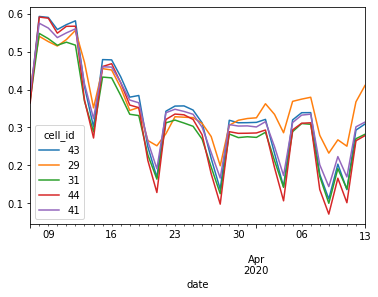

In [45]:
pivoted = pd.pivot_table(home_cell, index='date', columns='cell_id', values='out_pct')
pivoted[pivoted.index >= '2020-03-07'][np.random.choice(pivoted.columns, 5)].plot()

In [46]:
def robust_max(srs, n=3):
    sort = sorted(srs)
    return np.mean(sort[-n:])

def robust_min(srs, n=3):
    sort = sorted(srs)
    return np.mean(sort[:n])

global_max = pivoted.apply(robust_max)
global_min = pivoted.apply(robust_min)
# global_min, global_max = 0,1
span = global_max - global_min
relative_rate = pivoted.apply(lambda row: (row - global_min) / span, axis=1)

In [47]:
def weighted_std(values, weights):
    average = np.average(values, weights=weights)
    variance = np.average((values-average)**2, weights=weights)
    return np.sqrt(variance)

def avg_by_dates(df, from_date, to_date, weights=None):
    filtered = df[(df.index >= from_date) & (df.index <= to_date)]
    if weights is None:
        return filtered.describe().T[['mean','std','min','max']]
    
    weights = pd.Series(weights)
    stats = filtered.describe().T[['min','max']]
    stats['mean'] = filtered.apply(lambda col: np.average(col, weights=weights))
    stats['std'] = filtered.apply(lambda col: weighted_std(col, weights=weights))
    return stats

In [48]:
result = dict()
result['routine'] = avg_by_dates(relative_rate, '2020-02-02', '2020-02-29')
result['no_school'] = avg_by_dates(relative_rate, '2020-03-14', '2020-03-16', 
                         weights={'2020-03-14': 2/7, '2020-03-15': 2.5/7, '2020-03-16': 2.5/7})
result['no_work'] = avg_by_dates(relative_rate, '2020-03-17', '2020-03-25', 
                       weights={i:1/14 if i.day in [17,18,24,25] else 1/7
                                  for i in pd.date_range('2020-03-17', '2020-03-25')})
result['no_100_meters'] = avg_by_dates(relative_rate, '2020-03-26', '2020-04-02', 
                              weights={i:1/14 if i.day in [26,2] else 1/7
                                       for i in pd.date_range('2020-03-26', '2020-04-02')})
result['no_bb'] = avg_by_dates(relative_rate, '2020-04-03', '2020-04-06', 
                         weights={i:5/14 if i.day in [5,6] else 1/7
                                  for i in pd.date_range('2020-04-03', '2020-04-06')})

In [49]:
# save
try:
    os.mkdir('../Data/stay_home')
except:
    pass
result['routine'].to_csv('../Data/stay_home/routine.csv')
result['no_school'].to_csv('../Data/stay_home/no_school.csv')
result['no_work'].to_csv('../Data/stay_home/no_work.csv')
result['no_100_meters'].to_csv('../Data/stay_home/no_100_meters.csv')
result['no_bb'].to_csv('../Data/stay_home/no_bb.csv')

## Creating demograph/sick_pop.csv

In [50]:
taz2sick = pd.read_csv('../Data/sick/taz2sick.csv')
taz2sick.head()

,taz_id,cases_prop
0,1,0.099284
1,2,0.099284
2,3,0.099284
3,4,0.099284
4,5,0.099284


In [51]:
taz2cell = pd.read_excel('../Data/division_choice/'+ cell_name + '/taz2cell.xlsx')
taz2cell.head()

,taz_id,cell_id
0,1,43
1,2,51_tlv
2,3,51_tlv
3,4,51_tlv
4,5,51_tlv


In [52]:
pop_dist = pd.read_excel('../Data/raw/pop2taz.xlsx', header=2)
ages_list = ['Unnamed: '+ str(i) for i in range(17,32)]

pop_dist = pop_dist[['אזור 2630', 'גילאים'] + ages_list]
pop_dist.columns = ['id'] + list(pop_dist.iloc[0,1:])
pop_dist = pop_dist.drop([0, 2631, 2632, 2633])
pop_dist['tot_pop'] = pop_dist.iloc[:, 1:].sum(axis=1)
pop_dist['tot_pop'][pop_dist['tot_pop'] == 0] = 1
pop_dist = pop_dist.iloc[:,1:-1].div(pop_dist['tot_pop'], axis=0).join(pop_dist['id']).join(pop_dist['tot_pop'])
pop_dist['tot_pop'][pop_dist['tot_pop'] == 1] = 0
pop_dist['tot_pop'] = pop_dist['tot_pop']/pop_dist['tot_pop'].sum()
pop_dist.iloc[:,:-2] = pop_dist.iloc[:,:-2].mul(pop_dist['tot_pop'], axis=0)
pop_dist = pop_dist[['id', 'tot_pop']]
pop_dist.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,id,tot_pop
1,1,0.000460
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000135


In [53]:
taz2sick = taz2sick.merge(taz2cell, on='taz_id')
taz2sick.head()

,taz_id,cases_prop,cell_id
0,1,0.099284,43
1,2,0.099284,51_tlv
2,3,0.099284,51_tlv
3,4,0.099284,51_tlv
4,5,0.099284,51_tlv


In [54]:
taz2sick = taz2sick.merge(pop_dist, left_on='taz_id', right_on='id')
taz2sick.head()

,taz_id,cases_prop,cell_id,id,tot_pop
0,1,0.099284,43,1,0.000460
1,2,0.099284,51_tlv,2,0.000000
2,3,0.099284,51_tlv,3,0.000000
3,4,0.099284,51_tlv,4,0.000000
4,5,0.099284,51_tlv,5,0.000135


In [55]:
taz2sick['cases_prop'] = taz2sick['cases_prop'] * taz2sick['tot_pop']

In [56]:
def wheighted_average(df):
    tot = df['tot_pop'].sum()
    return (df['cases_prop'].sum() / tot)

taz2sick = taz2sick.groupby(by='cell_id')[['cases_prop', 'tot_pop']].apply(wheighted_average)

In [57]:
taz2sick.name='cases_prop'

In [58]:
taz2sick

cell_id
11               0.137496
21               0.010918
22               0.006482
23               0.037189
24               0.018083
29               0.003412
31               0.032753
32               0.013306
41               0.038895
42               0.107472
43               0.052105
44               0.063460
51               0.071989
61               0.067554
62               0.050836
71               0.083930
11_betshemesh    0.012624
51_bb            0.091095
51_tlv           0.099284
62_arab          0.001706
Name: cases_prop, dtype: float64

In [59]:
taz2sick.to_csv('../Data/demograph/sick_prop.csv')

# Data Loading

In [60]:
# import data:
with (open('../Data/division_choice/'+ cell_name + '/mat_macro_model_df.pickle', 'rb')) as openfile:
    OD_dict = pickle.load(openfile)

base_leisure = pd.read_csv('../Data/raw/leisure_mtx.csv',index_col=0)
base_work = pd.read_csv('../Data/raw/work_mtx.csv',index_col=0)
base_school = pd.read_csv('../Data/raw/school_mtx.csv',index_col=0)


stay_home_idx_school =  pd.read_csv('../Data/stay_home/no_school.csv',index_col=0)
stay_home_idx_school.index = stay_home_idx_school.index.astype(str)
stay_home_idx_work =  pd.read_csv('../Data/stay_home/no_work.csv',index_col=0)
stay_home_idx_work.index = stay_home_idx_work.index.astype(str)
stay_home_idx_routine =  pd.read_csv('../Data/stay_home/routine.csv',index_col=0)
stay_home_idx_routine.index = stay_home_idx_routine.index.astype(str)
stay_home_idx_no_100_meters =  pd.read_csv('../Data/stay_home/no_100_meters.csv',index_col=0)
stay_home_idx_no_100_meters.index = stay_home_idx_no_100_meters.index.astype(str)
stay_home_idx_no_bb =  pd.read_csv('../Data/stay_home/no_bb.csv',index_col=0)
stay_home_idx_no_bb.index = stay_home_idx_no_bb.index.astype(str)

religion_dist = pd.read_csv('../Data/demograph/religion_dis.csv',index_col=0)
age_dist_area = pd.read_csv('../Data/demograph/age_dist_area.csv',index_col=0)

home_secularism = pd.read_excel('../Data/raw/secularism_base_home.xlsx',index_col=0)
home_haredi = pd.read_excel('../Data/raw/haredi_base_home.xlsx',index_col=0)
home_arabs = pd.read_excel('../Data/raw/arabs_base_home.xlsx',index_col=0)

In [61]:
# fix_shahaf_bug
if cell_name=='250':
    if len(str(OD_dict[list(OD_dict.keys())[0]].columns[0]))==6:
        for k in OD_dict.keys():
            OD_dict[k].columns = pd.Index(G.values())
    if len(str(OD_dict[list(OD_dict.keys())[0]].index[0]))==6:
        for k in OD_dict.keys():
            OD_dict[k].index = pd.Index(G.values())

In [62]:
OD_dict.keys()

dict_keys([('no_work', 0), ('no_work', 1), ('no_work', 2), ('no_100_meters', 0), ('no_100_meters', 1), ('no_100_meters', 2), ('no_bb', 0), ('no_bb', 1), ('no_bb', 2), ('routine', 0), ('routine', 1), ('routine', 2), ('no_school', 0), ('no_school', 1), ('no_school', 2)])

In [63]:
age_dist_area

,cell_id,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0,11,0.013979,0.012611,0.022022,0.018316,0.013655,0.010615,0.008611,0.007099,0.007104
1,11_betshemesh,0.002288,0.002029,0.002915,0.001865,0.001517,0.001078,0.000667,0.000415,0.000322
2,21,0.001418,0.001315,0.002302,0.002117,0.001599,0.001484,0.001358,0.001159,0.000989
3,22,0.001270,0.001194,0.002259,0.002107,0.001663,0.001558,0.001353,0.001152,0.000932
4,23,0.005327,0.005231,0.010311,0.008815,0.006906,0.006904,0.005563,0.004178,0.003461
5,24,0.006462,0.006577,0.013503,0.011486,0.009269,0.009198,0.007313,0.005092,0.004055
6,29,0.000527,0.000564,0.001104,0.000825,0.000766,0.000751,0.000517,0.000406,0.000230
7,31,0.005195,0.004713,0.008240,0.008949,0.008935,0.007906,0.007046,0.007609,0.008289
8,32,0.004746,0.004858,0.009143,0.007088,0.006413,0.006360,0.004805,0.003526,0.002860
9,41,0.004818,0.004925,0.008916,0.006962,0.006616,0.007082,0.005361,0.004692,0.004559


In [64]:
base_leisure

,0-4,5-9,10-19,20-29,30-39,40-49,50-59,60-69,70+
0-4,1.910947,0.785434,0.605625,0.947981,1.217311,0.539321,0.526174,0.327925,0.136674
5-9,0.855218,3.058522,1.270115,0.586938,0.994774,0.548865,0.307890,0.281533,0.096498
10-19,0.188896,0.833542,5.118978,0.980886,0.664389,0.573172,0.223943,0.129148,0.077123
20-29,0.216756,0.165483,1.147046,2.721855,1.030819,0.491379,0.301705,0.088583,0.054323
30-39,0.263324,0.231474,0.380568,0.938731,1.367406,0.614261,0.391434,0.205911,0.073415
40-49,0.098300,0.127266,0.312787,0.458589,0.688429,0.540939,0.255728,0.131058,0.066109
50-59,0.086537,0.105663,0.236436,0.604374,0.589119,0.457537,0.457947,0.236600,0.077892
60-69,0.072166,0.081541,0.124618,0.379717,0.528686,0.365015,0.373055,0.358650,0.143989
70+,0.035686,0.043422,0.112453,0.160497,0.271909,0.236009,0.190299,0.271175,0.190983


In [65]:
OD_dict['routine', 1].index

Index(['11', '11_betshemesh', '21', '22', '23', '24', '29', '31', '32', '41',
       '42', '43', '44', '51', '51_tlv', '51_bb', '61', '62', '62_arab', '71'],
      dtype='object')

In [66]:
stay_home_idx_work

,min,max,mean,std
cell_id,,,,
11,0.129992,0.583611,0.366991,0.135096
21,0.069201,0.620141,0.399414,0.163663
22,0.076221,0.584896,0.360964,0.146013
23,0.084136,0.550295,0.336270,0.138302
24,0.103196,0.544159,0.345627,0.136878
29,0.065087,0.475486,0.225890,0.117821
31,0.095304,0.588612,0.374698,0.143043
32,0.106674,0.569548,0.362895,0.138519
41,0.069615,0.577845,0.357656,0.145178


# Processing stay home index

In [67]:
# reordering and expanding vector for each period:
stay_home_idx_school = stay_home_idx_school['mean'].values
stay_home_idx_school[1] = stay_home_idx_school[0]

stay_home_idx_work = stay_home_idx_work['mean'].values
stay_home_idx_work[1] = stay_home_idx_work[0]

stay_home_idx_no_100_meters = stay_home_idx_no_100_meters['mean'].values
stay_home_idx_no_100_meters[1] = stay_home_idx_no_100_meters[0]

stay_home_idx_no_bb = stay_home_idx_no_bb['mean'].values
stay_home_idx_no_bb[1] = stay_home_idx_no_bb[0]

# expanding vectors:
stay_home_idx_school = expand_partial_array(mapping_dic=region_ga_dict,array_to_expand=stay_home_idx_school,
                                              size=len(GA))
stay_home_idx_work = expand_partial_array(mapping_dic=region_ga_dict,array_to_expand=stay_home_idx_work,
                                              size=len(GA))
stay_home_idx_no_100_meters = expand_partial_array(mapping_dic=region_ga_dict,array_to_expand=stay_home_idx_no_100_meters,
                                              size=len(GA))
stay_home_idx_no_bb = expand_partial_array(mapping_dic=region_ga_dict,array_to_expand=stay_home_idx_no_bb,
                                              size=len(GA))

In [68]:
# preparing model objects:
stay_idx_t = []
routine_vector = []
d_tot = 500

# first days of routine from Feb 21st - March 13th
d_routin = 9+13
for i in range(d_routin):
    stay_idx_t.append(1.0)
    routine_vector.append(0)

# first days of no school from March 14th - March 16th
d_school = 3
for i in range(d_school):
    stay_idx_t.append(stay_home_idx_school)
    routine_vector.append(1)

# without school and work from March 17th - March 25th
d_work = 9
for i in range(d_work):
    stay_idx_t.append(stay_home_idx_work)
    routine_vector.append(1)

# 100 meters constrain from March 26th - April 2nd
d_100 = 8
for i in range(d_100):
    stay_idx_t.append(stay_home_idx_no_100_meters)
    routine_vector.append(1)

# Bnei Brak quaranrine from April 3rd
for i in range(d_tot-(d_routin+d_school+d_work+d_100)):
    stay_idx_t.append(stay_home_idx_no_bb)
    routine_vector.append(1)

In [69]:
stay_idx_calibration = {
    'non_inter':{
        'work': stay_idx_t,
        'not_work': stay_idx_t
    }, 
    'inter': {
        'work': [0]*500,
        'not_work': [0]*500,
    }
}

routine_vector_calibration = {
    'non_inter':{
        'work': routine_vector,
        'not_work': routine_vector
    }, 
    'inter': {
        'work': [1]*500,
        'not_work': [1]*500,
    }
}

In [70]:
# save objects
with open('../Data/parameters/stay_home_idx.pickle', 'wb') as handle:
    pickle.dump(stay_idx_calibration, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../Data/parameters/routine_t.pickle', 'wb') as handle:
    pickle.dump(routine_vector_calibration, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Leisure Matrix

## routine

In [71]:
############ 21.2-14.3 #############
full_leisure_routine = create_C_mtx_leisure_work(
    od_mat=OD_dict['routine',2], 
    base_mat=base_leisure, 
    age_dist_area=age_dist_area
)

############ 14.3-16.3 #############
full_leisure_no_school = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_school',2], 
    base_mat=base_leisure, 
    age_dist_area=age_dist_area
)

############ 17.3-25.3 #############
full_leisure_no_work = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_work',2], 
    base_mat=base_leisure, 
    age_dist_area=age_dist_area
)

############ 26.3-2.4 #############
full_leisure_no_100_meters = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_100_meters',2], 
    base_mat=base_leisure, 
    age_dist_area=age_dist_area
)

############ 3.4-6.4 #############
full_leisure_no_bb = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_bb',2], 
    base_mat=base_leisure, 
    age_dist_area=age_dist_area
)

In [72]:
# save matrix
try:
    os.mkdir('../Data/base_contact_mtx')
except:
    pass
scipy.sparse.save_npz('../Data/base_contact_mtx/full_leisure_routine.npz', full_leisure_routine)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_leisure_no_school.npz', full_leisure_no_school)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_leisure_no_work.npz', full_leisure_no_work)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_leisure_no_100_meters.npz', full_leisure_no_100_meters)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_leisure_no_bb.npz', full_leisure_no_bb)

## work

In [73]:
# creating school- work matrix;
base_work_school = base_work.copy()
base_work_school.loc['0-4'] = base_school.loc['0-4']
base_work_school.loc['5-9'] = base_school.loc['5-9']
base_work_school['0-4'] = base_school['0-4']
base_work_school['5-9'] = base_school['5-9']

In [74]:
# creating eye matrix
eye_OD = OD_dict['routine', 1].copy()

for col in eye_OD.columns:
    eye_OD[col].values[:] = 0
eye_OD.values[[np.arange(eye_OD.shape[0])]*2] = 1

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [75]:
############ 21.2-14.3 #############
full_work_routine = create_C_mtx_leisure_work(
    od_mat=OD_dict['routine',1], 
    base_mat=base_work_school, 
    age_dist_area=age_dist_area,
    eye_mat=eye_OD
)

############ 14.3-16.3 #############
full_work_no_school = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_school',1], 
    base_mat=base_work_school, 
    age_dist_area=age_dist_area,
    eye_mat=eye_OD
)

############ 17.3-25.3 #############
full_work_no_work = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_work',1], 
    base_mat=base_work_school, 
    age_dist_area=age_dist_area,
    eye_mat=eye_OD
)

############ 26.3-2.4 #############
full_work_no_100_meters = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_100_meters',1], 
    base_mat=base_work_school, 
    age_dist_area=age_dist_area,
    eye_mat=eye_OD
)

############ 3.4-6.4 #############
full_work_no_bb = create_C_mtx_leisure_work(
    od_mat=OD_dict['no_bb',1], 
    base_mat=base_work_school, 
    age_dist_area=age_dist_area,
    eye_mat=eye_OD
)

In [76]:
# save matrix
try:
    os.mkdir('../Data/base_contact_mtx')
except:
    pass
scipy.sparse.save_npz('../Data/base_contact_mtx/full_work_routine.npz', full_work_routine)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_work_no_school.npz', full_work_no_school)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_work_no_work.npz', full_work_no_work)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_work_no_100_meters.npz', full_work_no_100_meters)
scipy.sparse.save_npz('../Data/base_contact_mtx/full_work_no_bb.npz', full_work_no_bb)

## Home

In [77]:
full_home = pd.DataFrame(index = pd.MultiIndex.from_tuples(list(MI.values()),names=['age','area','age']), 
                             columns=OD_dict['routine', 0].index)

In [78]:
religion_dist.set_index('cell_id', inplace=True)
religion_dist.index = religion_dist.index.astype(str)
religion_dist

,Orthodox,Druze,Other,Sacular,Muslim,Christian,Jewish
cell_id,,,,,,,
11,0.185980,0.000000,0.000000e+00,0.458991,0.355029,1.940938e-07,0.644971
11_betshemesh,0.484846,0.000000,0.000000e+00,0.501050,0.002032,0.000000e+00,0.997968
21,0.177966,0.000000,0.000000e+00,0.366010,0.160123,1.868575e-02,0.821191
22,0.040832,0.139189,0.000000e+00,0.609073,0.092481,8.167484e-02,0.686654
23,0.004214,0.000000,4.984116e-05,0.426478,0.518378,5.088025e-02,0.430691
24,0.001474,0.048861,0.000000e+00,0.264098,0.658857,2.670948e-02,0.265572
29,0.000493,0.248076,0.000000e+00,0.708899,0.042532,0.000000e+00,0.709392
31,0.029402,0.017138,0.000000e+00,0.808637,0.111583,3.323917e-02,0.838039
32,0.005536,0.000001,0.000000e+00,0.438949,0.555514,2.747023e-07,0.444485


In [79]:
# fill the matrix:
for index in list(full_home.index):
    religion_area = religion_dist.loc[index[1]].copy()
    cell_val = religion_area['Orthodox'] * home_haredi.loc[index[0]][index[2]] + \
                religion_area['Sacular'] * home_secularism.loc[index[0]][index[2]] + \
                religion_area['Christian'] * home_arabs.loc[index[0]][index[2]] + \
                religion_area['Other'] * home_secularism.loc[index[0]][index[2]] + \
                religion_area['Druze'] * home_arabs.loc[index[0]][index[2]] + \
                religion_area['Muslim'] * home_arabs.loc[index[0]][index[2]]
    full_home.loc[index] = (eye_OD.loc[index[1]] * cell_val) / age_dist_area[index[2]]

full_home = csr_matrix(full_home.unstack().reorder_levels(['area','age']).sort_index().values.astype(float))

In [80]:
# save matrix
try:
    os.mkdir('../Data/base_contact_mtx')
except:
    pass
scipy.sparse.save_npz('../Data/base_contact_mtx/full_home.npz', full_home)

# $$\beta_{home}$$

In [82]:
# Calculating beta home
beta_home = 0.8 * full_home.unstack().reorder_levels(['area','age']).sort_index().sum(axis=1)/9

AttributeError: unstack not found

In [ ]:
# Save beta_home
with open('../Data/parameters/beta_home.pickle', 'wb') as handle:
    pickle.dump(beta_home.values, handle, protocol=pickle.HIGHEST_PROTOCOL)